---
Some useful $\LaTeX$ commands are defined in this cell:
$$
\newcommand{\abs}[1]{\left\lvert#1\right\rvert}
\newcommand{\norm}[1]{\left\lVert#1\right\rVert}
\newcommand{\set}[1]{\left\{#1\right\}}
\newcommand{\paren}[1]{\left(#1\right)}
\newcommand{\brack}[1]{\left[#1\right]}
\newcommand{\ip}[2]{\left\langle#1,#2\right\rangle}
\DeclareMathOperator{\span}{span}
\DeclareMathOperator{\fl}{fl}
\abs{x}, \norm{x}, \set{x}, \paren{x}, \brack{x}, \ip{x}{y}, \span, \fl
$$

---

---
# 16.1 Initial value ordinary differential equations
---

## Ordinary differential equations and initial value problems

Many important applied problems can be posed as finding a function $y(t)$ that satisfies an **ordinary differential equation (ODE)**:

$$ \frac{dy}{dt} = f(t, y), \quad a \leq t \leq b. $$

That is, the slope of the graph of the function $y = y(t)$ at time $t$ must be given by $f(t, y)$.

An ODE with an initial condition $y(a) = c$ is called an **initial value ODE problem**:

$$ \frac{dy}{dt} = f(t, y), \quad a \leq t \leq b, \quad y(a) = c. $$

---
If $f$ is only a function of $t$, then we can solve the differential equation by integration:

$$
\frac{dy}{dt} = f(t)
\quad\implies\quad
y(t) = \int_a^t f(\tau)\,d\tau + C.
$$

---

## Example

Consider the ODE with $f(t,y) = -5y + 5t^2 + 2t$ over the interval $[0,1]$:

$$\frac{dy}{dt} = -5y + 5t^2 + 2t, \quad 0 \leq t \leq 1.$$

Verify that for any scalar $\alpha$ the function

$$y(t) = t^2 + \alpha e^{-5t}$$

satisfies this ODE.

Given an additional condition that $y(0) = c$, we can determine that $\alpha = c$.


Check that $y(t)$ satisfies the differential equation:

$$
y'(t) = 2t - 5 \alpha e^{-5t}
$$

$$
\frac{dy}{dt} = -5 (t^2 + \alpha e^{-5t}) + 5t^2 + 2t
$$

$$
\frac{dy}{dt} = -5t^2 - 5 \alpha e^{-5t} + 5t^2 + 2t
$$

$$
\frac{dy}{dt} = -5 \alpha e^{-5t} + 2t
$$

In [5]:
# ODE is dy/dt = f(t, y)
f(t, y) = -5y + 5t^2 + 2t

f (generic function with 1 method)

[ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee] (cache misses: wrong dep version loaded (2), incompatible header (6))


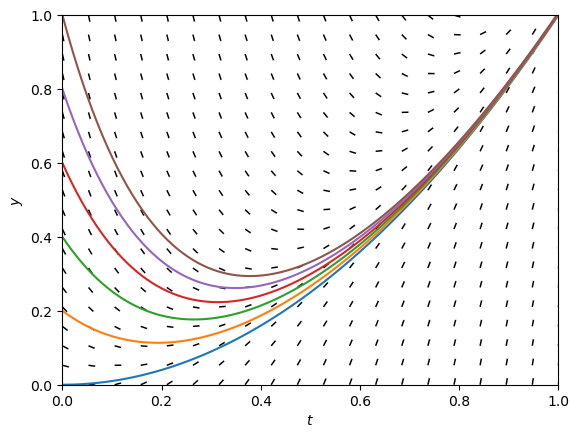

In [6]:
using PyPlot

a, b, N = 0, 1, 20

# Create the t and y meshes of points
tt = range(a, b, length=N)
yy = range(a, b, length=N)

# dy/dt = f(t, y)
dt = [1.0 for y in yy, t in tt]
dy = [f(t, y) for y in yy, t in tt]

# Normalize arrow lengths
r = (dt.^2 + dy.^2).^0.5
u, v = dt./r, dy./r

# Create the slope field plot
quiver(tt, yy, u, v, headwidth=0)
ylabel(L"y")
xlabel(L"t");

# Plot some solution trajectories
tspan = range(a, b, length=100)
for c = 0:.2:1
    plot(tspan, tspan.^2 + c*exp.(-5tspan))
end
xlim(0, 1)
ylim(0, 1);

---

## Numerical solution of initial value problems

In this chapter we study numerical methods to approximate the function $y(t)$ that solves the initial value problem

$$ \frac{dy}{dt} = f(t, y), \quad a \leq t \leq b, \quad y(a) = c $$

at evenly spaced points $a = t_0 < t_1 < \cdots < t_N = b$, where 

$$h = \frac{b - a}{N}, \quad t_i = a + ih, \quad i = 0, 1, \ldots, N.$$

We will compute $y_i$ such that $y_i \approx y(t_i)$, for all $i$.

---

## Example

Consider the initial value problem

$$\frac{dy}{dt} = -5y + 5t^2 + 2t, \quad 0 \leq t \leq 1, \quad y(0) = 1.$$

The solution of this problem is $y(t) = t^2 + e^{-5t}$. We will approximate this solution using the Runge-Kutta (fourth order) method.

In [7]:
using ODE

In [8]:
# ODE is dy/dt = f(t, y)
f(t, y) = -5y + 5t^2 + 2t

a, b, N = 0, 1, 10

y0 = 1.0

tspan = range(a, b, length=N+1)

0.0:0.1:1.0

In [9]:
y(t) = t^2 + exp(-5t)

y (generic function with 1 method)

In [10]:
# Numerically solve the ODE using the 
# Runge-Kutta (fourth order) method
tout, yout = ode4(f, y0, tspan)

# Compute the exact solution
ytrue = y.(tout)

[tspan tout yout ytrue]

11×4 Matrix{Float64}:
 0.0  0.0  1.0       1.0
 0.1  0.1  0.616797  0.616531
 0.2  0.2  0.408213  0.407879
 0.3  0.3  0.313447  0.31313
 0.4  0.4  0.295607  0.295335
 0.5  0.5  0.332308  0.332085
 0.6  0.6  0.409968  0.409787
 0.7  0.7  0.520345  0.520197
 0.8  0.8  0.658439  0.658316
 0.9  0.9  0.821214  0.821109
 1.0  1.0  1.00683   1.00674

In [11]:
# Compute the absolute error
abserr = abs.(yout - ytrue)

11-element Vector{Float64}:
 0.0
 0.00026621528736658906
 0.0003332460030368023
 0.00031660055900156747
 0.0002717356301359941
 0.0002234268863940958
 0.00018132523603775486
 0.00014802207171560333
 0.00012310975738538676
 0.00010514001005434981
 9.250564610496781e-5

```
N = 10   =>  h = 0.1   =>  abserr = 1e-4
N = 100  =>  h = 0.01  =>  abserr = 1e-8
```

Therefore, `ode4` is $\mathcal{O}(h^4)$.

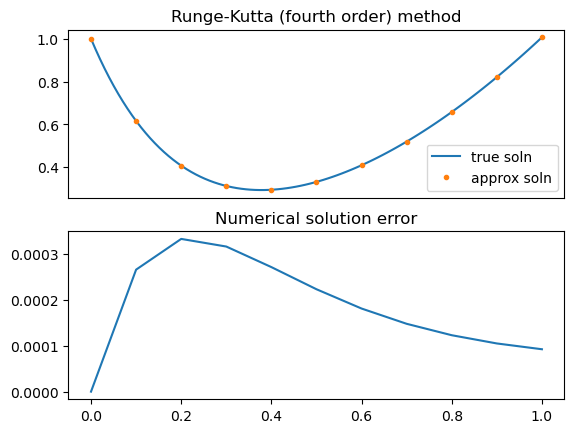

In [12]:
tt = range(a, b, length=100)

subplot(2, 1, 1)
plot(tt, y.(tt), label="true soln")
plot(tout, yout, ".", label="approx soln")
xticks([])
title("Runge-Kutta (fourth order) method")
legend()

subplot(2, 1, 2)
plot(tout, abserr)
title("Numerical solution error");

In [16]:
import Pkg; Pkg.add("DifferentialEquations")

   Resolving package versions...
   Installed HypergeometricFunctions ───── v0.3.28
   Installed StatsFuns ─────────────────── v1.4.0
   Installed DifferentialEquations ─────── v7.16.1
   Installed BoundaryValueDiffEqMIRK ───── v1.6.0
   Installed BoundaryValueDiffEqFIRK ───── v1.6.0
   Installed Sundials_jll ──────────────── v5.2.3+0
   Installed PDMats ────────────────────── v0.11.34
   Installed AlmostBlockDiagonals ──────── v0.1.10
   Installed CEnum ─────────────────────── v0.5.0
   Installed SteadyStateDiffEq ─────────── v2.5.0
   Installed Distances ─────────────────── v0.10.12
   Installed RandomNumbers ─────────────── v1.6.0
   Installed BoundaryValueDiffEqCore ───── v1.8.0
   Installed Functors ──────────────────── v0.5.2
   Installed BandedMatrices ────────────── v1.9.4
   Installed NLsolve ───────────────────── v4.5.1
   Installed BoundaryValueDiffEq ───────── v5.16.0
   Installed BoundaryValueDiffEqMIRKN ──── v1.5.0
   Installed Rmath_jll ─────────────────── v0.5.1+0
   In

In [17]:
using DifferentialEquations

f(y, p, t) = -5y + 5t^2 + 2t

y0 = 1.0
tspan = (0.0, 1.0)
prob = ODEProblem(f, y0, tspan)

ODEProblem with uType Float64 and tType Float64. In-place: false
Non-trivial mass matrix: false
timespan: (0.0, 1.0)
u0: 1.0

In [18]:
sol = solve(prob)

retcode: Success
Interpolation: 3rd order Hermite
t: 11-element Vector{Float64}:
 0.0
 0.0517346956664927
 0.11517129736679454
 0.19233139439782038
 0.28100103574387275
 0.38134767769213296
 0.49294003575628664
 0.6196602837900606
 0.7649485018527972
 0.9310261713147245
 1.0
u: 11-element Vector{Float64}:
 1.0
 0.7747515894538931
 0.5754876631254646
 0.41925064668549317
 0.3243279927115749
 0.29399124855848513
 0.3280257224444741
 0.4291069285021681
 0.6069740024573114
 0.8763290111399491
 1.0067426424363632

In [19]:
sol(0.5)

0.332086143782187

In [20]:
sol.t

11-element Vector{Float64}:
 0.0
 0.0517346956664927
 0.11517129736679454
 0.19233139439782038
 0.28100103574387275
 0.38134767769213296
 0.49294003575628664
 0.6196602837900606
 0.7649485018527972
 0.9310261713147245
 1.0

In [21]:
sol.t[2:end] - sol.t[1:end-1] 

10-element Vector{Float64}:
 0.0517346956664927
 0.06343660170030185
 0.07716009703102583
 0.08866964134605237
 0.1003466419482602
 0.11159235806415368
 0.1267202480337739
 0.14528821806273662
 0.16607766946192737
 0.06897382868527546

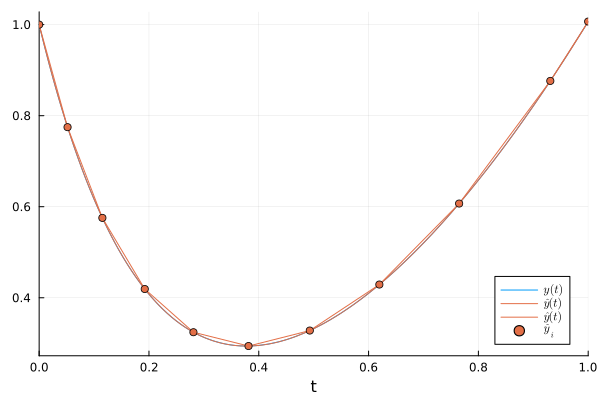

In [31]:
using Plots
using LaTeXStrings

Plots.plot(y, 0, 1, c=1, label=L"y(t)", legend=:bottomright)
Plots.plot!(sol, c=2, label=L"\hat{y}(t)")
Plots.plot!(sol.t, sol.u, c=2, label=L"\hat{y}(t)")
Plots.scatter!(sol.t, sol.u, c=2, label=L"\hat{y}_i")

---

## ODE systems

Both the function $y(t)$ and $f(t, y)$ can be **vector-valued** functions, which gives us an ODE system, such as

$$
y' = \begin{bmatrix} y_1' \\ y_2' \end{bmatrix} = \begin{bmatrix} f_1(t, y) \\ f_2(t, y) \end{bmatrix} = f(t, y).
$$

This is especially useful for expressing higher order differential equations as a first order ODE system.

---

## Example

The friction-free motion of a swinging pendulum of length $r$ is given by the second-order initial value problem

$$
\frac{d^2 \theta}{dt^2} + \frac{g}{r} \sin \theta = 0, \quad \theta(0) = c_0, \quad \theta'(0) = c_1,
$$

where $\theta(t)$ is the vertical angle of the pendulum and $g \approx 9.8~\mathrm{m/s^2}$ is the accelation due to gravity.

If we let $y_1(t) = \theta(t)$ and $y_2(t) = \theta'(t)$, then

$$
y' = \begin{bmatrix} y_1' \\ y_2' \end{bmatrix} = \begin{bmatrix} y_2 \\ -\frac{g}{r}\sin y_1 \end{bmatrix} = f(t, y), \quad y(0) = \begin{bmatrix} c_0 \\ c_1 \end{bmatrix}.
$$

In [23]:
g = 9.8
r = 1.0

# Without friction
#f(t, y) = [y[2]; -g/r*sin(y[1])]

# With friction
f(t, y) = [y[2]; -g/r*sin(y[1]) - y[2]]

f (generic function with 2 methods)

In [24]:
a, b, N = 0, 10, 100

tspan = range(a, b, length=N+1)

0.0:0.1:10.0

In [25]:
y0 = [pi/4, 2]

# Numerically solve the ODE system
tout, yout = ode4(f, y0, tspan)

yout

101-element Vector{Vector{Float64}}:
 [0.7853981633974483, 2.0]
 [0.9402990619717828, 1.0966226085642548]
 [1.0055771528872672, 0.2175202761344048]
 [0.9862443909780139, -0.5891127796249148]
 [0.8913569666415483, -1.287961676762519]
 [0.7334277819129766, -1.8438039948707263]
 [0.5286550155675346, -2.2186749425398133]
 [0.29685454579902554, -2.3803250819466326]
 [0.0601712830155592, -2.316753394102801]
 [-0.15953068866136644, -2.046293173735745]
 [-0.34368715769949154, -1.6151121705737108]
 [-0.4792102326171057, -1.0840113502987925]
 [-0.5591971592622891, -0.5138911588531044]
 ⋮
 [0.0037351363816188143, -0.04054379244244557]
 [-0.0002357804580243126, -0.03826915939203866]
 [-0.0038071049981793876, -0.03267152103977718]
 [-0.006686552408649978, -0.02458475121832609]
 [-0.008673637735693667, -0.014993611141458536]
 [-0.00966948350288067, -0.004928283798103304]
 [-0.009676294886222356, 0.0046352310101964835]
 [-0.00878753682985727, 0.012860209556303067]
 [-0.007170607708587881, 0.019113315

In [26]:
θ = [y[1] for y in yout]

101-element Vector{Float64}:
  0.7853981633974483
  0.9402990619717828
  1.0055771528872672
  0.9862443909780139
  0.8913569666415483
  0.7334277819129766
  0.5286550155675346
  0.29685454579902554
  0.0601712830155592
 -0.15953068866136644
 -0.34368715769949154
 -0.4792102326171057
 -0.5591971592622891
  ⋮
  0.0037351363816188143
 -0.0002357804580243126
 -0.0038071049981793876
 -0.006686552408649978
 -0.008673637735693667
 -0.00966948350288067
 -0.009676294886222356
 -0.00878753682985727
 -0.007170607708587881
 -0.005044325308146154
 -0.0026537992029542577
 -0.00024526078232153315

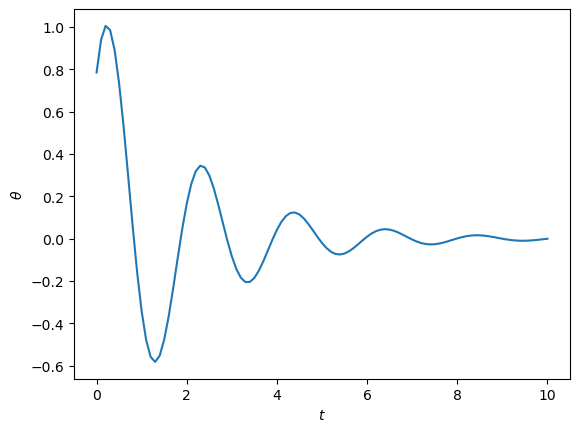

In [27]:
plot(tout, θ)
xlabel(L"t")
ylabel(L"\theta");

---